In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
with open('/kaggle/input/iam-handwriting-word-database/words_new.txt', 'r') as file:
    data = file.read()

In [5]:
# Get the lines to transform file into Dataframe : 
lines = data.split('\n')

lines[:25]

['#--- words.txt ---------------------------------------------------------------#',
 '#',
 '# iam database word information',
 '#',
 '# format: a01-000u-00-00 ok 154 1 408 768 27 51 AT A',
 '#',
 '#     a01-000u-00-00  -> word id for line 00 in form a01-000u',
 '#     ok              -> result of word segmentation',
 '#                            ok: word was correctly',
 '#                            er: segmentation of word can be bad',
 '#',
 '#     154             -> graylevel to binarize the line containing this word',
 '#     1               -> number of components for this word',
 '#     408 768 27 51   -> bounding box around this word in x,y,w,h format',
 '#     AT              -> the grammatical tag for this word, see the',
 '#                        file tagset.txt for an explanation',
 '#     A               -> the transcription for this word',
 '#',
 'a01-000u-00-00 ok 154 408 768 27 51 AT A',
 'a01-000u-00-01 ok 154 507 766 213 48 NN MOVE',
 'a01-000u-00-02 ok 154 796 764 

In [6]:
head_data = lines[:18]
head_data

['#--- words.txt ---------------------------------------------------------------#',
 '#',
 '# iam database word information',
 '#',
 '# format: a01-000u-00-00 ok 154 1 408 768 27 51 AT A',
 '#',
 '#     a01-000u-00-00  -> word id for line 00 in form a01-000u',
 '#     ok              -> result of word segmentation',
 '#                            ok: word was correctly',
 '#                            er: segmentation of word can be bad',
 '#',
 '#     154             -> graylevel to binarize the line containing this word',
 '#     1               -> number of components for this word',
 '#     408 768 27 51   -> bounding box around this word in x,y,w,h format',
 '#     AT              -> the grammatical tag for this word, see the',
 '#                        file tagset.txt for an explanation',
 '#     A               -> the transcription for this word',
 '#']

In [7]:
lines = lines[18:]
lines[:20]

['a01-000u-00-00 ok 154 408 768 27 51 AT A',
 'a01-000u-00-01 ok 154 507 766 213 48 NN MOVE',
 'a01-000u-00-02 ok 154 796 764 70 50 TO to',
 'a01-000u-00-03 ok 154 919 757 166 78 VB stop',
 'a01-000u-00-04 ok 154 1185 754 126 61 NPT Mr.',
 'a01-000u-00-05 ok 154 1438 746 382 73 NP Gaitskell',
 'a01-000u-00-06 ok 154 1896 757 173 72 IN from',
 'a01-000u-01-00 ok 156 395 932 441 100 VBG nominating',
 'a01-000u-01-01 ok 156 901 958 147 79 DTI any',
 'a01-000u-01-02 ok 156 1112 958 208 42 AP more',
 'a01-000u-01-03 ok 156 1400 937 294 59 NN Labour',
 'a01-000u-01-04 ok 156 1779 932 174 63 NN life',
 'a01-000u-01-05 ok 156 2008 933 237 70 NNS Peers',
 'a01-000u-02-00 ok 157 408 1106 65 70 BEZ is',
 'a01-000u-02-01 ok 157 541 1118 72 54 TO to',
 'a01-000u-02-02 ok 157 720 1114 113 63 BE be',
 'a01-000u-02-03 ok 157 916 1136 281 46 VBN made',
 'a01-000u-02-04 ok 157 1281 1117 80 59 IN at',
 'a01-000u-02-05 ok 157 1405 1140 64 35 AT a',
 'a01-000u-02-06 ok 157 1544 1115 339 96 NN meeting']

In [8]:
# transform into data frame : 

import pandas as pd



split_data = [line.split() for line in lines]
combined_data = [line[:8] + [' '.join(line[8:])] for line in split_data]

# Creating the DataFrame
column_names = ['ID', 'Segmentation', 'graylevel', 'x', 'y', 'w', 'h', 'grammatical tag', 'transcription']
df = pd.DataFrame(combined_data, columns=column_names)

df.head()


,ID,Segmentation,graylevel,x,y,w,h,grammatical tag,transcription
0,a01-000u-00-00,ok,154,408,768,27,51,AT,A
1,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE
2,a01-000u-00-02,ok,154,796,764,70,50,TO,to
3,a01-000u-00-03,ok,154,919,757,166,78,VB,stop
4,a01-000u-00-04,ok,154,1185,754,126,61,NPT,Mr.


In [9]:
df[df['Segmentation'] == 'err'].shape

(6259, 9)

In [10]:
df[df['Segmentation'] == 'ok'].shape

(38305, 9)

## Extract the text

In [11]:
text = ' '.join(df['transcription'].astype(str).tolist())

## Create a map index between chars and indexes

In [65]:
chars = sorted(list(set(text)))
char_to_index_map = {char: i for i, char in enumerate(chars)}
index_to_char_map = {i: char for i, char in enumerate(chars)}

In [13]:
char_to_index_map

{' ': 0,
 '!': 1,
 '"': 2,
 '#': 3,
 "'": 4,
 '(': 5,
 ')': 6,
 '*': 7,
 ',': 8,
 '-': 9,
 '.': 10,
 '/': 11,
 '0': 12,
 '1': 13,
 '2': 14,
 '3': 15,
 '4': 16,
 '5': 17,
 '6': 18,
 '7': 19,
 '8': 20,
 '9': 21,
 ':': 22,
 ';': 23,
 '?': 24,
 'A': 25,
 'B': 26,
 'C': 27,
 'D': 28,
 'E': 29,
 'F': 30,
 'G': 31,
 'H': 32,
 'I': 33,
 'J': 34,
 'K': 35,
 'L': 36,
 'M': 37,
 'N': 38,
 'O': 39,
 'P': 40,
 'Q': 41,
 'R': 42,
 'S': 43,
 'T': 44,
 'U': 45,
 'V': 46,
 'W': 47,
 'X': 48,
 'Y': 49,
 'Z': 50,
 'a': 51,
 'b': 52,
 'c': 53,
 'd': 54,
 'e': 55,
 'f': 56,
 'g': 57,
 'h': 58,
 'i': 59,
 'j': 60,
 'k': 61,
 'l': 62,
 'm': 63,
 'n': 64,
 'o': 65,
 'p': 66,
 'q': 67,
 'r': 68,
 's': 69,
 't': 70,
 'u': 71,
 'v': 72,
 'w': 73,
 'x': 74,
 'y': 75,
 'z': 76}

In [18]:
index_to_char_map

{0: ' ',
 1: '!',
 2: '"',
 3: '#',
 4: "'",
 5: '(',
 6: ')',
 7: '*',
 8: ',',
 9: '-',
 10: '.',
 11: '/',
 12: '0',
 13: '1',
 14: '2',
 15: '3',
 16: '4',
 17: '5',
 18: '6',
 19: '7',
 20: '8',
 21: '9',
 22: ':',
 23: ';',
 24: '?',
 25: 'A',
 26: 'B',
 27: 'C',
 28: 'D',
 29: 'E',
 30: 'F',
 31: 'G',
 32: 'H',
 33: 'I',
 34: 'J',
 35: 'K',
 36: 'L',
 37: 'M',
 38: 'N',
 39: 'O',
 40: 'P',
 41: 'Q',
 42: 'R',
 43: 'S',
 44: 'T',
 45: 'U',
 46: 'V',
 47: 'W',
 48: 'X',
 49: 'Y',
 50: 'Z',
 51: 'a',
 52: 'b',
 53: 'c',
 54: 'd',
 55: 'e',
 56: 'f',
 57: 'g',
 58: 'h',
 59: 'i',
 60: 'j',
 61: 'k',
 62: 'l',
 63: 'm',
 64: 'n',
 65: 'o',
 66: 'p',
 67: 'q',
 68: 'r',
 69: 's',
 70: 't',
 71: 'u',
 72: 'v',
 73: 'w',
 74: 'x',
 75: 'y',
 76: 'z'}

In [20]:
# text to int
text_to_int = [char_to_index_map[char] for char in text]
text_to_int[:20]

[25, 0, 37, 39, 46, 29, 0, 70, 65, 0, 69, 70, 65, 66, 0, 37, 68, 10, 0, 31]

## Prepare sequences of fixed length for training.

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding


The approach of omitting the first element from the target sequence and excluding the last element from the input sequence is key to training a character-level RNN for text generation.

### Training Objective:

The model's task is to predict the next character in a sequence based on the preceding characters. For example, given the input sequence [char_1, char_2, char_3, char_4], the model should predict char_5.
### Sequence Shifting:
#### Input Sequence: [char_1, char_2, char_3, char_4]
#### Target Sequence: [char_2, char_3, char_4, char_5] 
This setup is designed so that each character in the input sequence has a corresponding character in the target sequence, making it clear for the model what the next character should be. 

The RNN is trained to predict the next character in the sequence, and this shifting method ensures consistency between what the model is given (input) and what it needs to predict (target).

In [66]:
sequence_length = 20

# Create sequences
sequences = tf.data.Dataset.from_tensor_slices(text_to_int)
sequences = sequences.batch(sequence_length + 1, drop_remainder=True)

# Split into inputs and targets
def split_input_target(sequence):
    input_text = sequence[:-1] # no last char
    target_text = sequence[1:] # no first char
    return input_text, target_text

dataset = sequences.map(split_input_target)

## shuffle the dataset to generalize training and avoid overfitting
dataset = dataset.shuffle(10000).batch(64, drop_remainder=True).prefetch(tf.data.AUTOTUNE)


In [59]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 20), dtype=tf.int32, name=None), TensorSpec(shape=(64, 20), dtype=tf.int32, name=None))>

# Build a Recurent NN model with LSTM

Long Short-Term Memory (LSTM) networks are a specialized type of Recurrent Neural Network (RNN) designed to handle the problem of learning long-term dependencies in sequential data. LSTMs are particularly well-suited for tasks involving sequences, such as time series prediction, speech recognition, and text generation.

In [70]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding

vocab_size = len(chars)
embedding_dim = 256
rnn_units = 1024

model = tf.keras.Sequential([
    Input(shape=(sequence_length,)),
    Embedding(vocab_size, embedding_dim),
    LSTM(rnn_units, return_sequences=True),
    LSTM(rnn_units, return_sequences=True),
    Dense(vocab_size)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))


In [71]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 20, 256)        │        19,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 20, 1024)       │     5,246,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 20, 1024)       │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20, 77)         │        78,925 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,738,317 (52.41 MB)

 Trainable params: 13,738,317 (52.41 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [72]:
history = model.fit(dataset, epochs=10)

Epoch 1/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - loss: 3.2013
Epoch 2/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - loss: 2.2188
Epoch 3/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - loss: 1.9243
Epoch 4/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - loss: 1.7087
Epoch 5/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - loss: 1.5371
Epoch 6/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - loss: 1.3972
Epoch 7/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - loss: 1.2643
Epoch 8/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - loss: 1.1321
Epoch 9/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - loss: 1.0019
Epoch 10/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - loss: 0.8749


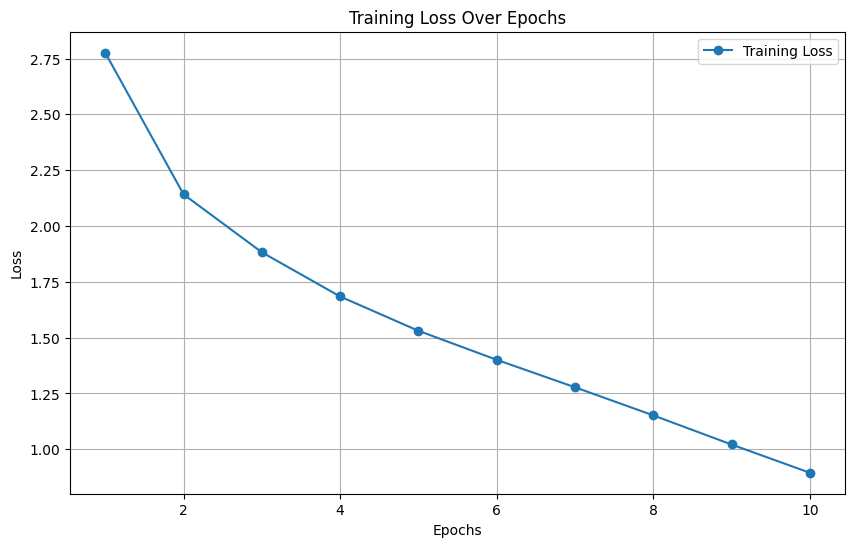

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1,11)], history.history['loss'], label='Training Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Text generation

In [74]:
def generate_text(model, start_string, num_generate=200):
    
    # Vectorize the start string
    input_indices = [char_to_index_map[char] for char in start_string]
    input_indices = tf.expand_dims(input_indices, 0)
    
    text_generated = []
    
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.LSTM):
            layer.reset_states()
            
    for _ in range(num_generate):
        predictions = model(input_indices)
        predictions = tf.squeeze(predictions, 0)
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()
        
        input_indices = tf.expand_dims([predicted_id], 0)
        text_generated.append(index_to_char_map[predicted_id])
    
    return start_string + ''.join(text_generated)



In [78]:
print(generate_text(model, "this has to be a text generator made with recurent neural network", num_generate=500))

this has to be a text generator made with recurent neural network o sw then aniorathacteapl halk f Tonovererst bupr : " ve he tevem ompethe . te Sican cyatst be orsutbersewnooplinteithantow , phenisio t wens chems OEr , war ang nmivesspl t wilt Prke hunte inis rowatuplanthayiad off tro inig onts Kexpoloom bulaitomerser Ancof abyire wisur de om anee acate iclouituntheits Mrhear h s " ompem ly ispaue prartr ns Beper thelapainghis tt ntende bo liss s s . Rut berstrembomsy I baber Mrethacorisy o beveghe s anind whar pompoorefo ang pik QUhe mimmin of be- t . chem 
